# Generate Mel-Spectrograms and MFCC Components

Generate mel-spectrograms and MFCC components from audio files using Librosa.
___
Abhay Jolly | ajolly@sfu.ca\
Harry Preet Singh | hps1@sfu.ca\
Karan Pathania | kpathani@sfu.ca\
Neil Mukesh Shah | nmshah@sfu.ca
___
CMPT 419, Spring 2022\
Simon Fraser University

# 0. Preprocessing

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

# Set directories
PROJECT_DIR = '/content/drive/MyDrive/CMPT 419 Project'
AUDIO_DIR = os.path.join(PROJECT_DIR, 'audio_dataset')
AUDIO_FILES_DIR = os.path.join(AUDIO_DIR, 'audio_data')
SPECTROGRAMS_DIR = os.path.join(AUDIO_DIR, 'spectrogram_mel')

In [ ]:
filenames_toxic = [os.path.splitext(os.path.basename(f))[0] for f in os.listdir(os.path.join(AUDIO_FILES_DIR, 'toxic'))]
filenames_nontoxic = [os.path.splitext(os.path.basename(f))[0] for f in os.listdir(os.path.join(AUDIO_FILES_DIR, 'nontoxic'))]

toxic_df = pd.DataFrame(filenames_toxic, columns=['Filename'])
nontoxic_df = pd.DataFrame(filenames_nontoxic, columns=['Filename'])

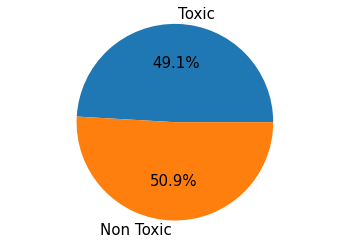

In [ ]:
# Show data distribution
labels = ['Toxic', 'Non Toxic']
y = [toxic_df.shape[0], nontoxic_df.shape[0]]

plt.pie(y, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

# 1. Spectrogram Generation


Below function can be used to create spectrogram images, it needs dataset containing filenames and input and output paths:

In [ ]:
import pylab

def create_spectrograms(df, path_output, path_input):
    sample_all = []
    data_all = []

    if not os.path.isdir(path_output):
            os.makedirs(path_output)

    for i in range(df.shape[0]):
            data, sample = librosa.load(path_input + "/{}.wav".format(df[i]), mono = True, duration = 5)

            sample_all.append(sample)
            data_all.append(data)

            # Mel Spectrogram
            ps = librosa.feature.melspectrogram(y=data, sr=sample)
            ps_db = librosa.power_to_db(ps, ref=np.max)
            librosa.display.specshow(ps_db)
            plt.savefig(f'{path_output}/{df[i]}.png')

    return data_all, sample_all

Below is an example, do it for all the folders seperately:

In [ ]:
audio_toxic_dir = os.path.join(AUDIO_DIR, 'toxic')
audio_nontoxic_dir = os.path.join(AUDIO_DIR, 'nontoxic')

spectrograms_toxic_dir = os.path.join(SPECTROGRAMS_DIR, 'toxic')
spectrograms_nontoxic_dir = os.path.join(SPECTROGRAMS_DIR, 'nontoxic')

# Run these to create the mel-spectrograms 
# create_spectrograms(toxic_df['Filename'], spectrograms_toxic_dir, audio_toxic_dir)
# create_spectrograms(nontoxic_df['Filename'], spectrograms_nontoxic_dir, audio_nontoxic_dir)

Use below function to play sounds:

In [ ]:
# ipd.Audio(path_audio_data + "/{}.wav".format(nontoxic['Filename'][0]))

# 2. MFCC Components Generation

In [ ]:
mfcc_components = []
def get_mfcc(dataset, path_input):
  for i in range(dataset.shape[0]):
        data, sample = librosa.load(path_input + "/{}.wav".format(dataset[i]), mono=True, duration=5)
        mfcc = librosa.feature.mfcc(y=data, sr=sample)
        mfcc_components.append((np.mean(mfcc.T, axis=0)))

  return mfcc_components

In [ ]:
# Get MFCC components for both toxic and non-toxic files
toxic_comps = get_mfcc(toxic_df['Filename'], audio_toxic_dir)
non_toxic_comps = get_mfcc(nontoxic_df['Filename'], audio_nontoxic_dir)

In [ ]:
toxic_df[['comp_{}'.format(i) for i in range(1, 21)]] = pd.DataFrame(toxic_comps)
toxic_df['Label'] = 1

nontoxic_df[['comp_{}'.format(i) for i in range(1, 21)]] = pd.DataFrame(non_toxic_comps)
nontoxic_df['Label'] = 0

In [ ]:
mfcc_comps = pd.concat([toxic_df, nontoxic_df])
mfcc_comps.to_csv('audio_mfcc.csv')